<a href="https://colab.research.google.com/github/94shreyas/Practise_Python/blob/main/Aerofit_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df=pd.read_csv('/content/Aerofit_Treadmill.csv')

# Step 1 :  Importing dataset and Data Analysis

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Step 2 : Detect Outliers and Identify relation ship between Product purchased and other metrics

Box plot to identify Outliers in Age/Education/Income/Fitness/MIles

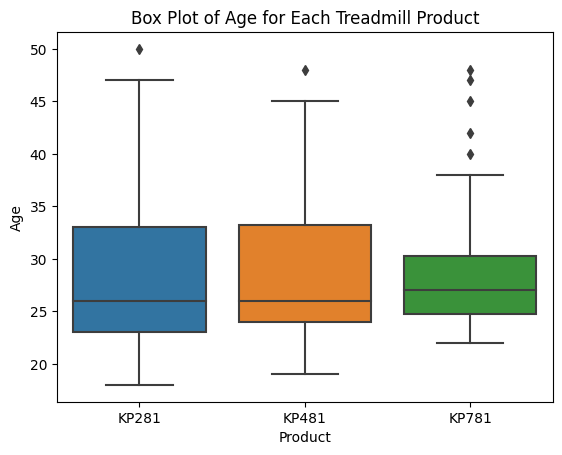

In [ ]:
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Box Plot of Age for Each Treadmill Product')
plt.show()

Observation : It is observed that KP781 is purchased by the younger age group only (majorly 24-30)

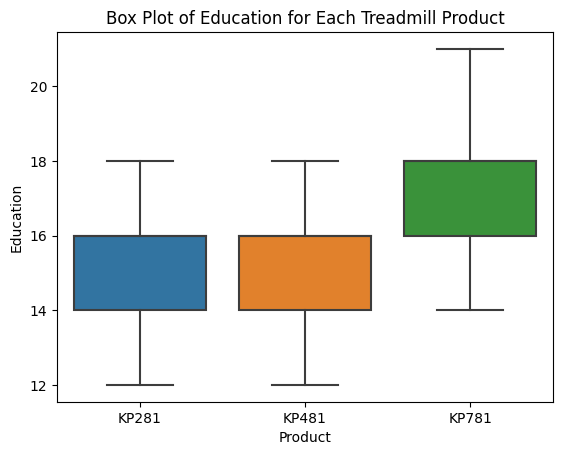

In [ ]:
sns.boxplot(x='Product', y='Education', data=df)
plt.title('Box Plot of Education for Each Treadmill Product')
plt.show()

Observation : It is observed that KP781 is purchased by the higher education group

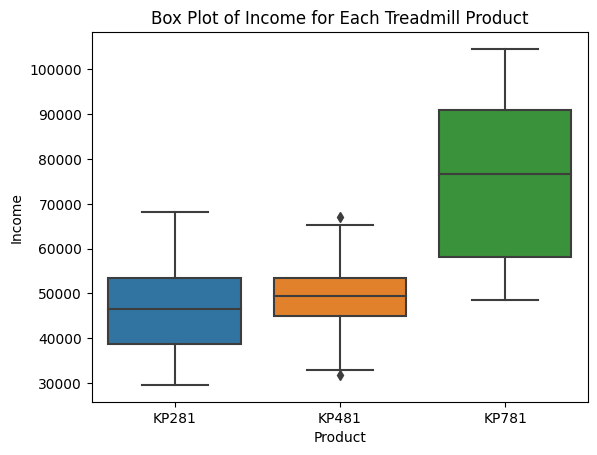

In [ ]:
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Box Plot of Income for Each Treadmill Product')
plt.show()

Observation : It is observed that KP781 is purchased by the higher income group, and KP481 by the medium income group

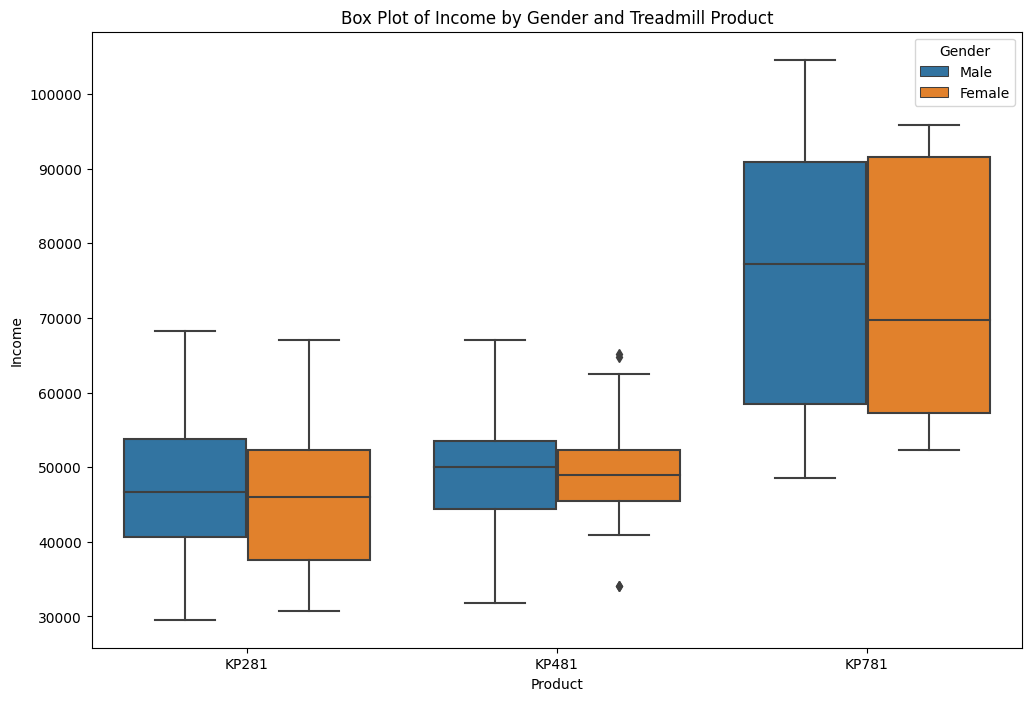

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product', y='Income', hue='Gender', data=df)
plt.title('Box Plot of Income by Gender and Treadmill Product')
plt.show()

Observation : Not much difference, Higher income group irrespective of gender prefer KP781

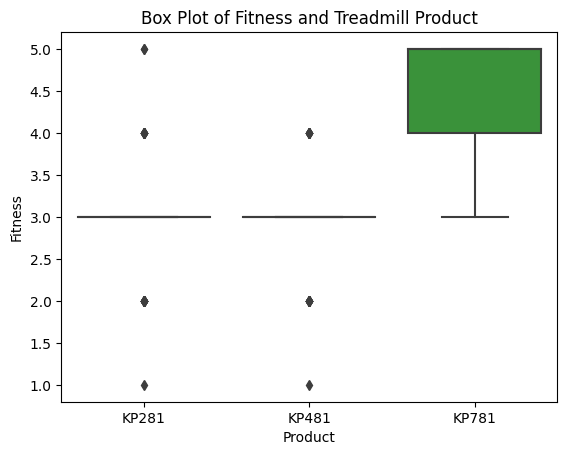

In [ ]:
sns.boxplot(x='Product', y='Fitness', data=df)
plt.title('Box Plot of Fitness and Treadmill Product')
plt.show()

Observation : Customers whose fitness level are above 3 prefer KP781

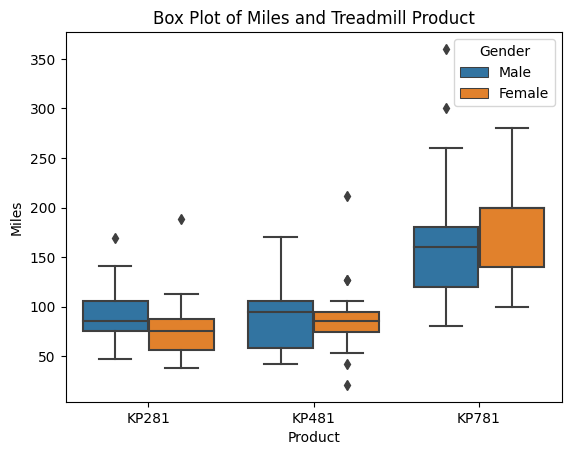

In [ ]:
sns.boxplot(x='Product', y='Miles',hue='Gender', data=df)
plt.title('Box Plot of Miles and Treadmill Product')
plt.show()

Observation : Customers who run lower Miles prefer KP281 or KP481, Customers whorun higher Miler prefer KP781

# Step 3 : Explore Relationships between Features

<ipython-input-40-96737a4813e8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


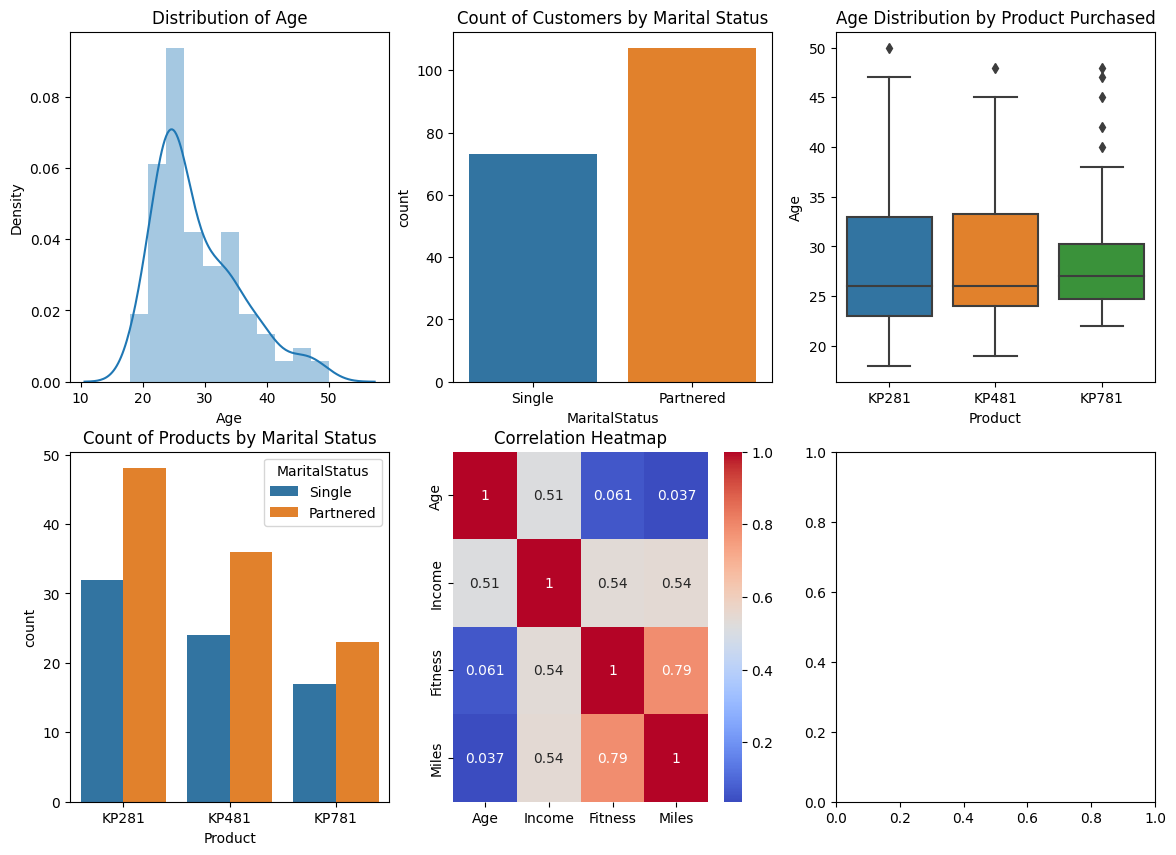

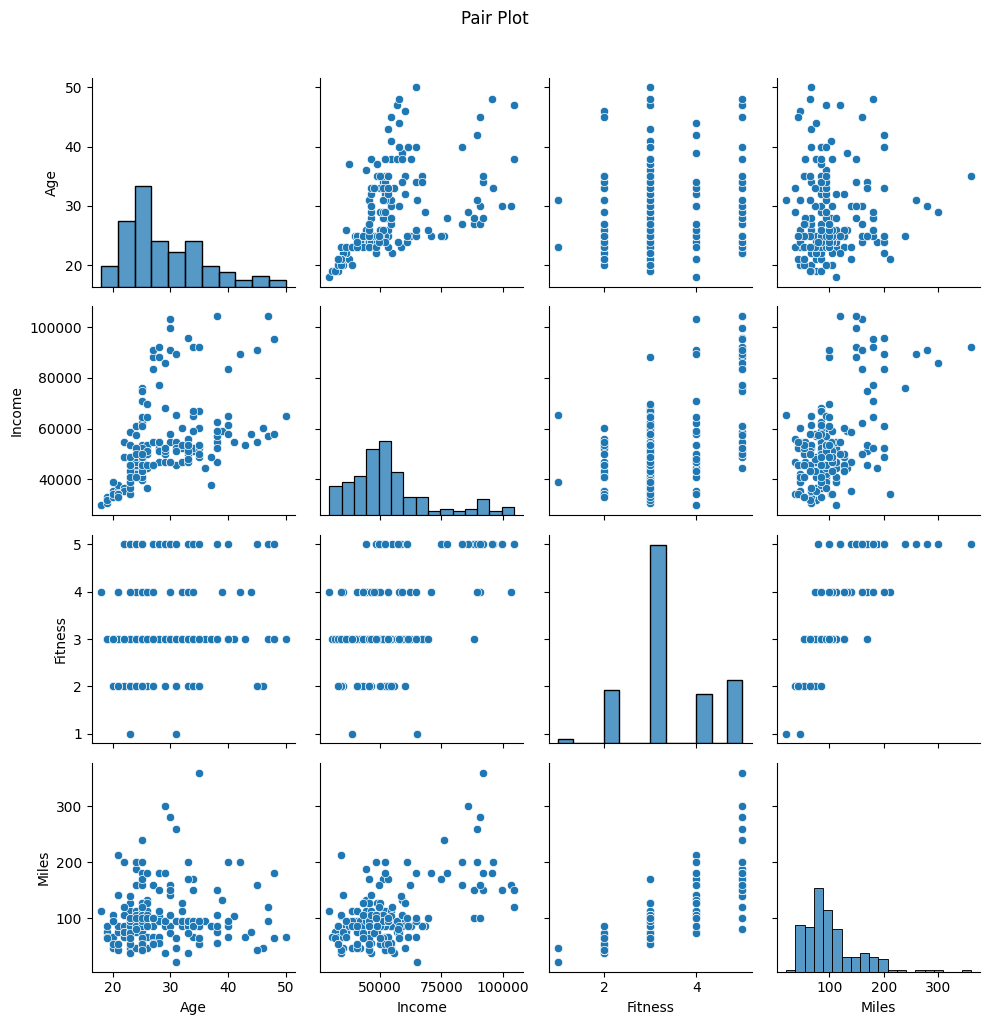

In [ ]:
plt.figure(figsize=(14, 10))

# Univariate Analysis
plt.subplot(2, 3, 1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.countplot(x='MaritalStatus', data=df)
plt.title('Count of Customers by Marital Status')

# Bivariate Analysis
plt.subplot(2, 3, 3)
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age Distribution by Product Purchased')

plt.subplot(2, 3, 4)
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Count of Products by Marital Status')

plt.subplot(2, 3, 5)
sns.heatmap(df[['Age', 'Income', 'Fitness', 'Miles']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.subplot(2, 3, 6)
sns.pairplot(df[['Age', 'Income', 'Fitness', 'Miles']])
plt.suptitle('Pair Plot', y=1.02)

plt.tight_layout()
plt.show()

# Step 4 : Representing Marginal Probabilities

In [ ]:
contingency_table_gender = pd.crosstab(df['Product'], df['Gender'], margins=True, margins_name='Total')
print(contingency_table_gender)


Gender   Female  Male  Total
Product                     
KP281        40    40     80
KP481        29    31     60
KP781         7    33     40
Total        76   104    180


Observation : Product Purchased vs Gender


  1.For KP281 and KP481, the gender distribution is roughly balanced, with approximately equal proportions of males and females.

  2.For KP781, there is a significant skew towards males, with a higher proportion of male customers compared to females.



In [ ]:
contingency_table_marital = pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, margins_name='Total')
print(contingency_table_marital)


MaritalStatus  Partnered  Single  Total
Product                                
KP281                 48      32     80
KP481                 36      24     60
KP781                 23      17     40
Total                107      73    180


Oservation: Product Purchased vs Marital Status

  1.For KP281 and KP481, the distribution of marital status is balanced, with approximately equal proportions of partnered and single individuals.

  2.For KP781, there is a slightly higher proportion of partnered individuals compared to single individuals.

In [ ]:

education_counts = pd.crosstab(df['Product'], df['Education'], margins=True, margins_name='Total')

# conditional probabilities
conditional_prob_education = education_counts.div(education_counts['Total'], axis=0)
print(conditional_prob_education)


Education        12        13        14        15        16        18  \
Product                                                                 
KP281      0.025000  0.037500  0.375000  0.050000  0.487500  0.025000   
KP481      0.016667  0.033333  0.383333  0.016667  0.516667  0.033333   
KP781      0.000000  0.000000  0.050000  0.000000  0.375000  0.475000   
Total      0.016667  0.027778  0.305556  0.027778  0.472222  0.127778   

Education        20        21  Total  
Product                               
KP281      0.000000  0.000000    1.0  
KP481      0.000000  0.000000    1.0  
KP781      0.025000  0.075000    1.0  
Total      0.005556  0.016667    1.0  


Observation : Product Purchased vs Education

 1.Education levels '16' and '18' seem to be associated with higher probabilities for KP281 and KP481, suggesting that individuals with these education levels are more likely to purchase entry-level and mid-level treadmills.

  2.Education level '18' has the highest conditional probability for KP781, indicating a potential preference for the advanced treadmill among individuals with this education level.

In [ ]:
# Product Purchased vs Fitness
fitness_counts = pd.crosstab(df['Product'], df['Fitness'], margins=True, margins_name='Total')

# conditional probabilities
conditional_prob_fitness = fitness_counts.div(fitness_counts['Total'], axis=0)
print(conditional_prob_fitness)


Fitness         1         2         3         4         5  Total
Product                                                         
KP281    0.012500  0.175000  0.675000  0.112500  0.025000    1.0
KP481    0.016667  0.200000  0.650000  0.133333  0.000000    1.0
KP781    0.000000  0.000000  0.100000  0.175000  0.725000    1.0
Total    0.011111  0.144444  0.538889  0.133333  0.172222    1.0


Observation: Product Purchased vs Fitness
  
  1.Fitness level '3' appears to be associated with higher probabilities for both KP281 and KP481, suggesting that individuals with moderate fitness levels are more likely to purchase entry-level and mid-level treadmills.

  2.Fitness level '5' has the highest conditional probability for KP781, indicating a potential preference for the advanced treadmill among individuals with higher fitness levels.

In [ ]:
# Product Purchased vs Usage
usage_counts = pd.crosstab(df['Product'], df['Usage'], margins=True, margins_name='Total')

# Conditional probabilities
conditional_prob_usage = usage_counts.div(usage_counts['Total'], axis=0)
print(conditional_prob_usage)


Usage           2         3         4         5         6         7  Total
Product                                                                   
KP281    0.237500  0.462500  0.275000  0.025000  0.000000  0.000000    1.0
KP481    0.233333  0.516667  0.200000  0.050000  0.000000  0.000000    1.0
KP781    0.000000  0.025000  0.450000  0.300000  0.175000  0.050000    1.0
Total    0.183333  0.383333  0.288889  0.094444  0.038889  0.011111    1.0


Observation: Product Purchased vs Usage

  1.Usage levels '3' and '4' appear to be associated with higher probabilities for both KP281 and KP481, suggesting that individuals planning to use the treadmill 3-4 times a week are more likely to purchase entry-level and mid-level treadmills.

  2.KP781 has a higher conditional probability for usage level '4', indicating a potential preference for the advanced treadmill among individuals planning to use it 4 times a week.

In [ ]:
# Product Purchased vs Miles
miles_counts = pd.crosstab(df['Product'], df['Miles'], margins=True, margins_name='Total')

# Conditional probabilities
conditional_prob_miles = miles_counts.div(miles_counts['Total'], axis=0)
print(conditional_prob_miles)


Miles          21        38        42      47        53        56        64  \
Product                                                                       
KP281    0.000000  0.037500  0.000000  0.1125  0.000000  0.075000  0.000000   
KP481    0.016667  0.000000  0.066667  0.0000  0.116667  0.000000  0.100000   
KP781    0.000000  0.000000  0.000000  0.0000  0.000000  0.000000  0.000000   
Total    0.005556  0.016667  0.022222  0.0500  0.038889  0.033333  0.033333   

Miles          66        74        75  ...       180       188       200  \
Product                                ...                                 
KP281    0.125000  0.000000  0.125000  ...  0.000000  0.012500  0.000000   
KP481    0.000000  0.050000  0.000000  ...  0.000000  0.000000  0.000000   
KP781    0.000000  0.000000  0.000000  ...  0.150000  0.000000  0.150000   
Total    0.055556  0.016667  0.055556  ...  0.033333  0.005556  0.033333   

Miles         212       240       260       280       300       360 

Observation: Product Purchased vs Miles

  1.Different treadmill products are associated with different expected weekly miles. For example, KP281 seems to attract customers with expectations of walking/running shorter distances, while KP781 is associated with customers expecting longer distances.

  2.The conditional probability table provides insights into the preferences of customers based on their expected usage, which can inform marketing and product development strategies.

# Step 5 : Correlation Among Different Factors

<ipython-input-54-28a4ff3d753a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_total.corr()


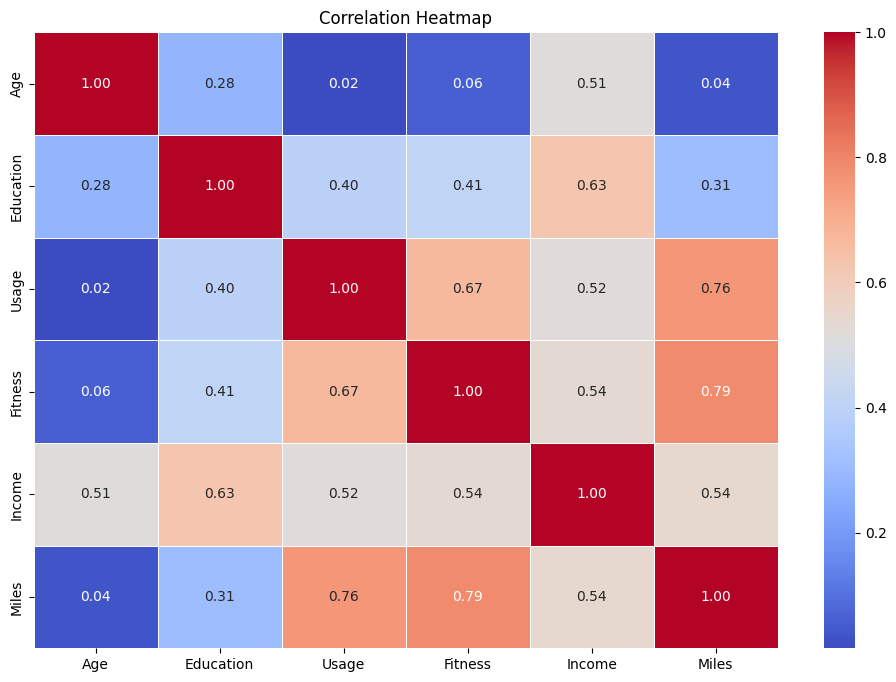

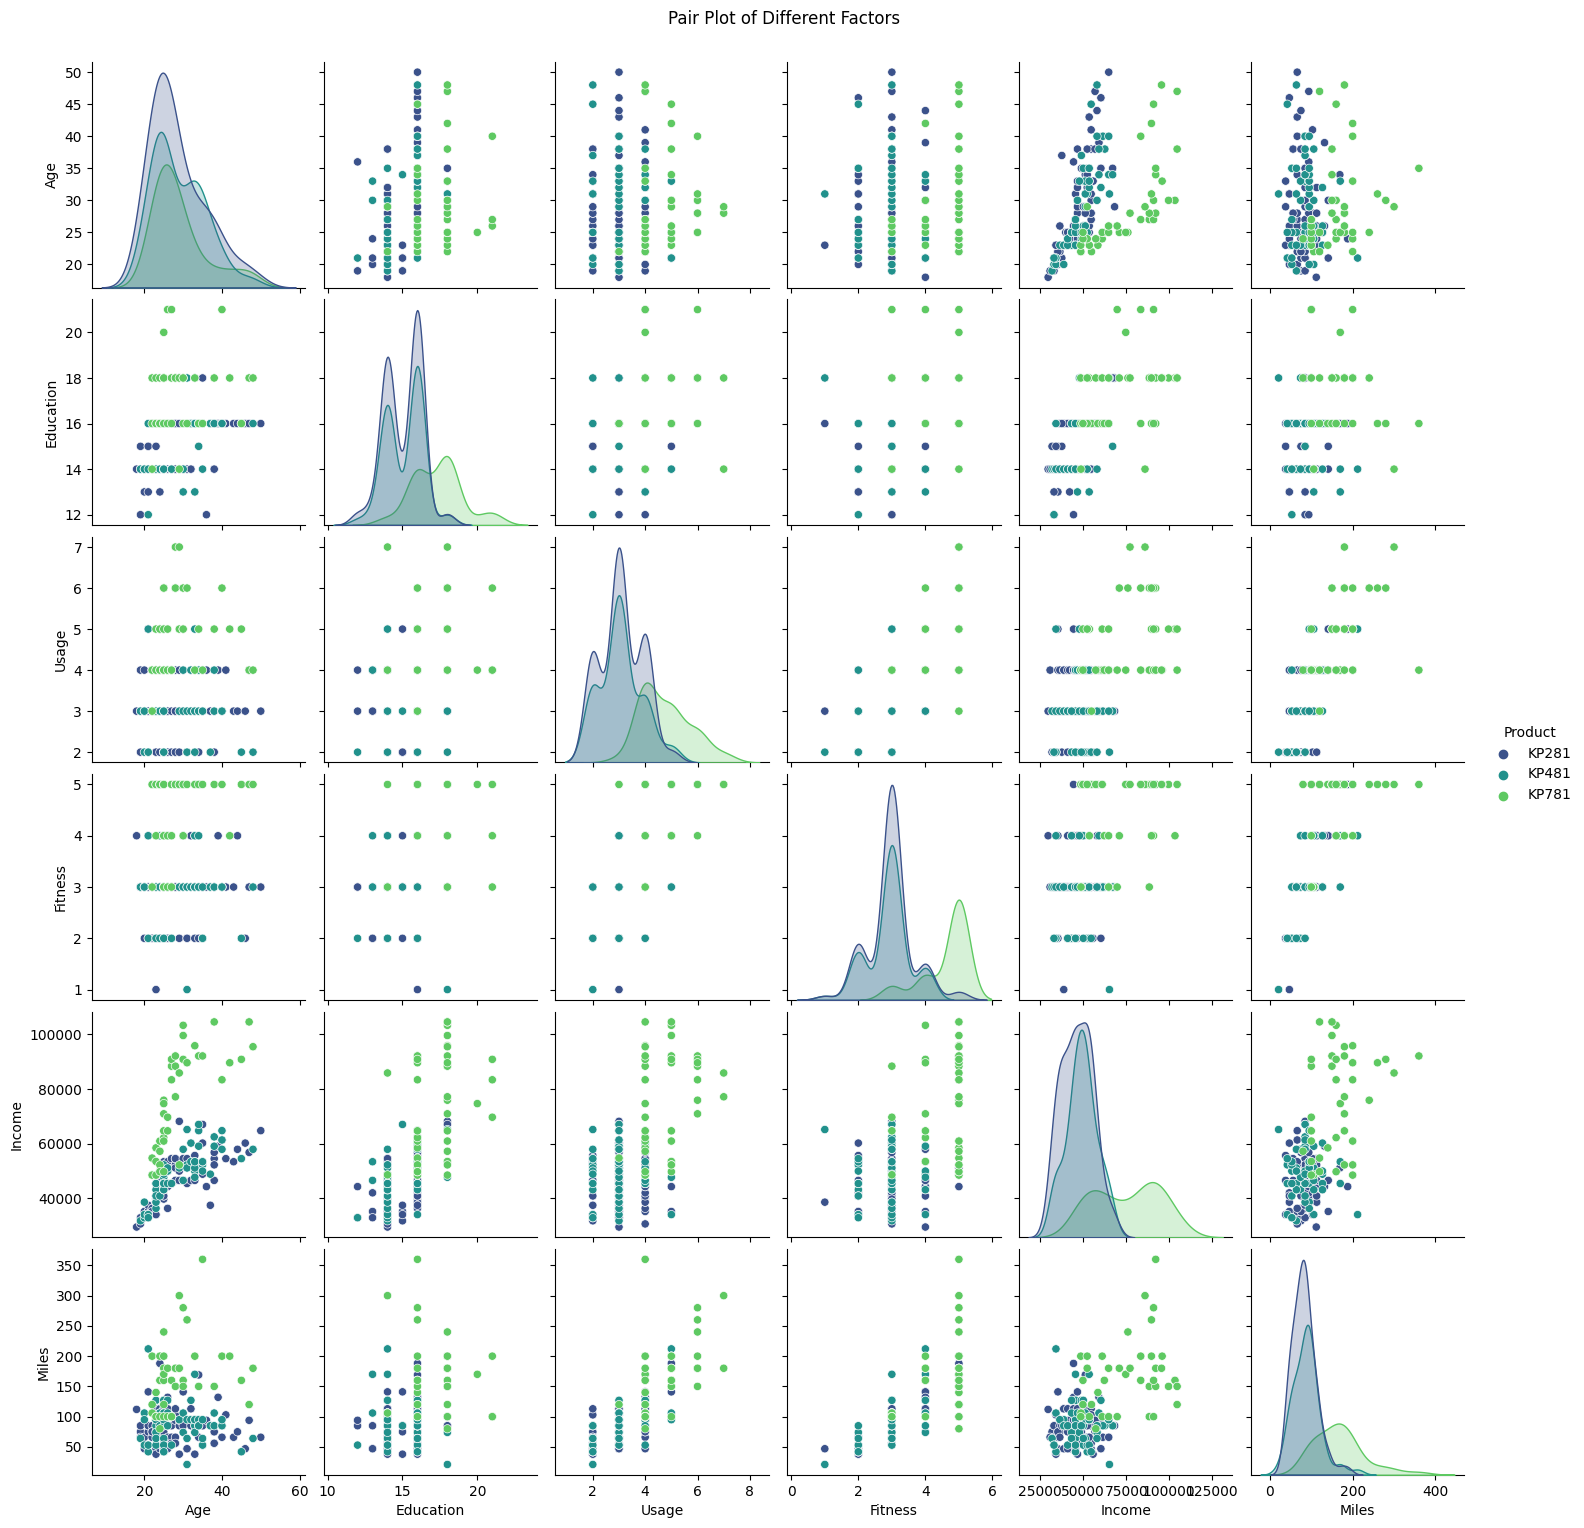

In [ ]:

# Drop the 'Total' row if it's present (as it might interfere with correlation calculations)
df_no_total = df.drop('Total', errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_no_total.corr()

# Heatmap for visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for visualizing pairwise relationships
sns.pairplot(df_no_total, hue='Product', palette='viridis')
plt.suptitle('Pair Plot of Different Factors', y=1.02)
plt.show()

# Step 6 : Customer Profiling - Categorization of Users

In [ ]:
# Categorize users into age groups
bins = [0, 30, 40, 50, 60, 100]  # Define age group bins
labels = ['<30', '30-40', '40-50', '50-60', '60+']  # Define labels for each age group
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


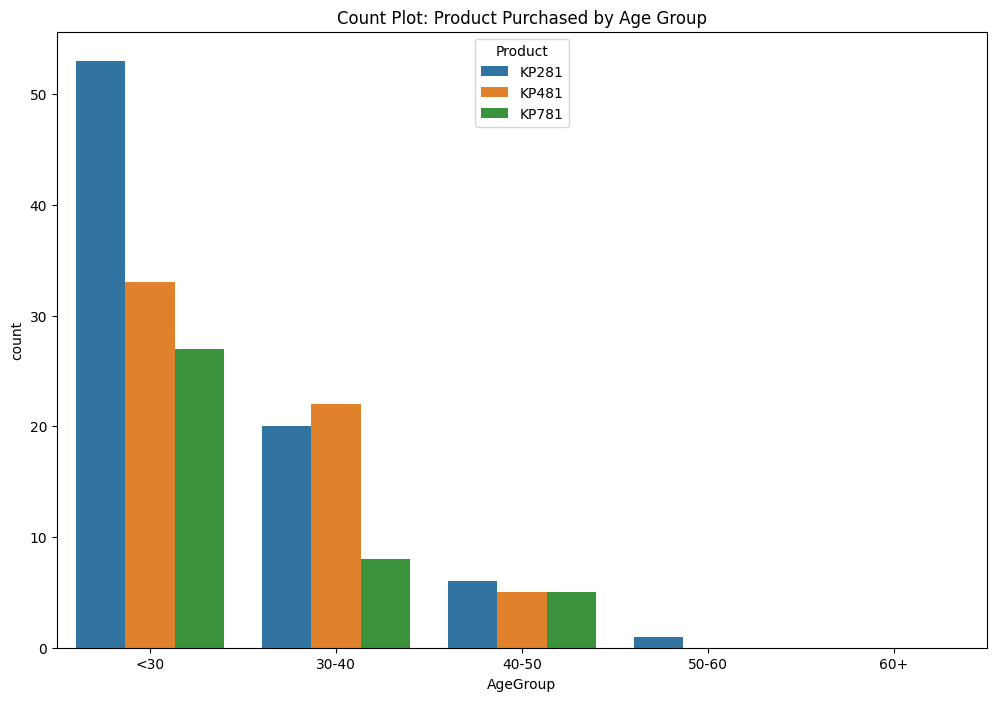

In [ ]:
# Count plot for 'AgeGroup' with hue 'Product Purchased'
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeGroup', hue='Product', data=df)
plt.title('Count Plot: Product Purchased by Age Group')
plt.show()


In [ ]:
# Crosstab for 'AgeGroup' and 'Product Purchased'
age_group_crosstab = pd.crosstab(df['AgeGroup'], df['Product'], margins=True, margins_name='Total')
print(age_group_crosstab)


Product   KP281  KP481  KP781  Total
AgeGroup                            
<30          53     33     27    113
30-40        20     22      8     50
40-50         6      5      5     16
50-60         1      0      0      1
Total        80     60     40    180


Interpretation:
  
  1.The <30 age group seems to favor the entry-level treadmill (KP281), with a moderate preference for the mid-level treadmill (KP481) and fewer preferences for the advanced treadmill (KP781).

  2.The 30-40 age group shows a relatively balanced distribution between KP281 and KP481, with lower purchases for KP781.

  3.The 40-50 age group leans toward the entry-level treadmill (KP281), with fewer purchases for mid-level (KP481) and advanced (KP781) treadmills.

  4.The 50-60 age group has only one recorded purchase, which is for the entry-level treadmill (KP281).

In [ ]:
# Categorize users into income groups
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]  # Define income bins
income_labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']  # Define labels for each income group
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)


In [ ]:
# Crosstab for 'IncomeGroup' and 'Product Purchased'
income_group_crosstab = pd.crosstab(df['IncomeGroup'], df['Product'], margins=True, margins_name='Total')
print(income_group_crosstab)


Product      KP281  KP481  KP781  Total
IncomeGroup                            
25k-50k         48     30      5     83
50k-75k         32     30     14     76
75k-100k         0      0     18     18
100k-150k        0      0      3      3
Total           80     60     40    180


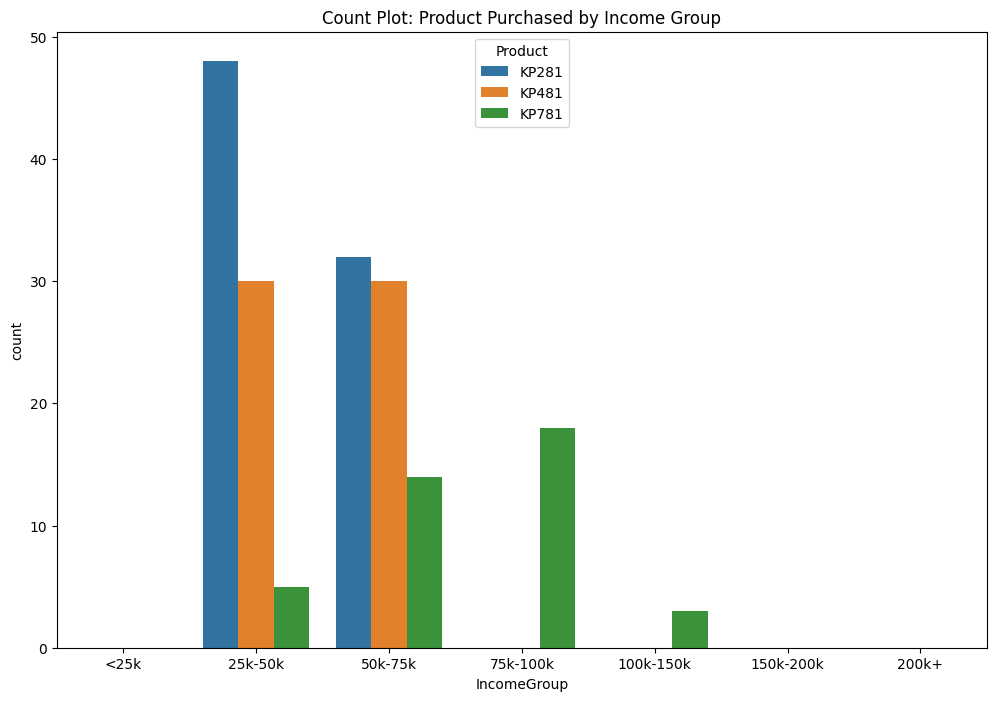

In [ ]:
# Count plot for 'IncomeGroup' with hue 'Product Purchased'
plt.figure(figsize=(12, 8))
sns.countplot(x='IncomeGroup', hue='Product', data=df)
plt.title('Count Plot: Product Purchased by Income Group')
plt.show()

Observation : Product Purchased vs Income

  1.Users with incomes between 25k and 50k seem to prefer the entry-level treadmill (KP281) the most, with fewer preferences for the mid-level (KP481) and advanced (KP781) treadmills.

  2.Users with incomes between 50k and 75k show a relatively balanced distribution between KP281 and KP481, with moderate purchases for KP781.

  3.Users with incomes between 75k and 100k exclusively prefer the advanced treadmill (KP781).

  4.Users with incomes between 100k and 150k also exclusively prefer the advanced treadmill (KP781).

# Step 7: Probability - Marginal, Conditional Probability

In [4]:
contingency_table_gender = pd.crosstab(df['Gender'], df['Product'], margins=True, margins_name='Total')
print(contingency_table_gender)


Product  KP281  KP481  KP781  Total
Gender                             
Female      40     29      7     76
Male        40     31     33    104
Total       80     60     40    180


In [5]:
# Total number of customers
total_customers = contingency_table_gender.loc['Total', 'Total']

# Total number of male customers
total_male_customers = contingency_table_gender.loc['Male', 'Total']

# Probability of a male customer buying a KP781 treadmill
probability_male_KP781 = contingency_table_gender.loc['Male', 'KP781'] / total_male_customers

print(f"The probability of a male customer buying a KP781 treadmill is: {probability_male_KP781:.2%}")


The probability of a male customer buying a KP781 treadmill is: 31.73%


In [6]:
# Probability of a male customer buying a KP781 treadmill given they are male
conditional_probability_male_KP781 = contingency_table_gender.loc['Male', 'KP781'] / total_customers

print(f"The conditional probability of a male customer buying a KP781 treadmill is: {conditional_probability_male_KP781:.2%}")


The conditional probability of a male customer buying a KP781 treadmill is: 18.33%


In [7]:
# Assuming df is your DataFrame
contingency_table_gender = pd.crosstab(df['Gender'], df['Product'], margins=True, margins_name='Total')

# Total number of customers
total_customers = contingency_table_gender.loc['Total', 'Total']

# Total number of female customers
total_female_customers = contingency_table_gender.loc['Female', 'Total']

# Probability of a female customer buying a KP781 treadmill
probability_female_KP781 = contingency_table_gender.loc['Female', 'KP781'] / total_female_customers

print(f"The probability of a female customer buying a KP781 treadmill is: {probability_female_KP781:.2%}")


The probability of a female customer buying a KP781 treadmill is: 9.21%


In [8]:
# Probability of any customer buying a KP481 treadmill
probability_KP481 = contingency_table_gender.loc['Total', 'KP481'] / total_customers
print(f"The probability of any customer buying a KP481 treadmill is: {probability_KP481:.2%}")


The probability of any customer buying a KP481 treadmill is: 33.33%


In [10]:
contingency_table_marital_status = pd.crosstab(df['MaritalStatus'], df['Product'], margins=True, margins_name='Total')

# Probability of any customer being single
probability_single = contingency_table_marital_status.loc['Single', 'Total'] / total_customers

# Conditional probability of a customer buying a KP781 treadmill given they are single
conditional_probability_single_KP781 = contingency_table_marital_status.loc['Single', 'KP781'] / contingency_table_marital_status.loc['Single', 'Total']

print(f"The conditional probability of a customer buying a KP781 treadmill given they are single is: {conditional_probability_single_KP781:.2%}")


The conditional probability of a customer buying a KP781 treadmill given they are single is: 23.29%


In [11]:
#Joint Probability of a Customer being Male and Purchasing KP481:
# Assuming df is your DataFrame
joint_probability_male_KP481 = contingency_table_gender.loc['Male', 'KP481'] / total_customers
print(f"The joint probability of a customer being male and buying a KP481 treadmill is: {joint_probability_male_KP481:.2%}")


The joint probability of a customer being male and buying a KP481 treadmill is: 17.22%


In [12]:
# Conditional Probability of a Customer Purchasing KP281 given Fitness Level 5
contingency_table_fitness = pd.crosstab(df['Fitness'], df['Product'], margins=True, margins_name='Total')

# Probability of any customer having fitness level 5
probability_fitness_5 = contingency_table_fitness.loc[5, 'Total'] / total_customers

# Conditional probability of a customer buying a KP281 treadmill given they have fitness level 5
conditional_probability_KP281_fitness_5 = contingency_table_fitness.loc[5, 'KP281'] / contingency_table_fitness.loc[5, 'Total']

print(f"The conditional probability of a customer buying a KP281 treadmill given they have fitness level 5 is: {conditional_probability_KP281_fitness_5:.2%}")


The conditional probability of a customer buying a KP281 treadmill given they have fitness level 5 is: 6.45%


In [13]:
# Conditional Probability of a Customer Purchasing KP281 given Fitness Level 5
contingency_table_fitness = pd.crosstab(df['Fitness'], df['Product'], margins=True, margins_name='Total')

# Probability of any customer having fitness level 5
probability_fitness_5 = contingency_table_fitness.loc[5, 'Total'] / total_customers

# Conditional probability of a customer buying a KP781 treadmill given they have fitness level 5
conditional_probability_KP781_fitness_5 = contingency_table_fitness.loc[5, 'KP781'] / contingency_table_fitness.loc[5, 'Total']

print(f"The conditional probability of a customer buying a KP781 treadmill given they have fitness level 5 is: {conditional_probability_KP781_fitness_5:.2%}")


The conditional probability of a customer buying a KP781 treadmill given they have fitness level 5 is: 93.55%
